In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

import ipywidgets as widgets
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
target_psc = np.load('target_data.npy')
template_psc = np.load('template_data.npy')

In [3]:
num_frames = target_psc.shape[0]

In [4]:
print("Frames: {} \t Size: {} x {} pixels".format(*target_psc.shape))

Frames: 42 	 Size: 13 x 9 pixels


#### Helper Functions

`add_pixel_grid`: Shows a pixel grid pattern

In [5]:
def add_pixel_grid(ax1, grid_height, grid_width, show_axis_labels=True, show_superpixel=False,
                   major_alpha=0.5, minor_alpha=0.25):
    """ Add a pixel grid pattern to the stamp """

    # major ticks every 2, minor ticks every 1
    if show_superpixel:
        x_major_ticks = np.arange(-0.5, grid_width, 2)
        y_major_ticks = np.arange(-0.5, grid_height, 2)

        ax1.set_xticks(x_major_ticks)
        ax1.set_yticks(y_major_ticks)

        ax1.grid(which='major', color='r', linestyle='--', alpha=major_alpha)
    else:
        ax1.set_xticks([])
        ax1.set_yticks([])

    x_minor_ticks = np.arange(-0.5, grid_width, 1)
    y_minor_ticks = np.arange(-0.5, grid_height, 1)

    ax1.set_xticks(x_minor_ticks, minor=True)
    ax1.set_yticks(y_minor_ticks, minor=True)

    ax1.grid(which='minor', color='r', lw='2', linestyle='--', alpha=minor_alpha)

    if show_axis_labels is False:
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

## Show Stamps

I have data for the target as well as a template and we wish to compare those for each frame

In [6]:
frame_index = 2

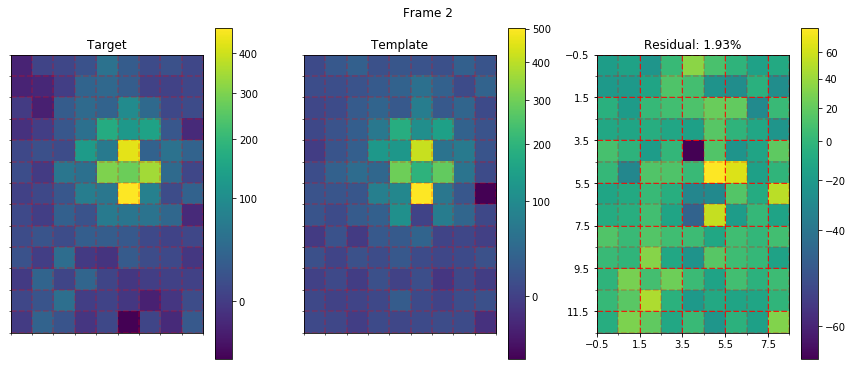

In [7]:
stamp_h = target_psc.shape[1]
stamp_w = target_psc.shape[2]

# Create Fig
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(12,5)

target_data = target_psc[frame_index]
template_data = template_psc[frame_index]

# Target Plot
im1 = ax1.imshow(target_data, norm=ImageNormalize(stretch=SqrtStretch()))
cbar1 = fig.colorbar(im1, ax=ax1)
cbar1.ax.tick_params(labelsize=10)
ax1.set_title("Target")

# Template Plot
im2 = ax2.imshow(template_data, norm=ImageNormalize(stretch=SqrtStretch()))
cbar2 = fig.colorbar(im2, ax=ax2)
cbar2.ax.tick_params(labelsize=10)
ax2.set_title("Template")

# Residual
residual = target_data - template_data
depth = target_data.sum() / template_data.sum()

im3 = ax3.imshow(residual, norm=ImageNormalize(stretch=SqrtStretch()))
cbar3 = fig.colorbar(im3, ax=ax3)
cbar3.ax.tick_params(labelsize=10)
ax3.set_title("Residual: {:0.02%}".format(1 - depth))

# Pixel grisd
add_pixel_grid(ax1, stamp_h, stamp_w, minor_alpha=0.2, show_axis_labels=True)
add_pixel_grid(ax2, stamp_h, stamp_w, minor_alpha=0.2)
add_pixel_grid(ax3, stamp_h, stamp_w, minor_alpha=0.2, major_alpha=1, show_superpixel=True)

fig.suptitle("Frame {}".format(frame_index), y=1.02)

fig.tight_layout()
# fig.savefig('stamp-comparison.png', dpi=300)
plt.show()

## Let's Animate!

In [8]:
def update_fig(frame_index):    
    print('.', end='')
    target_data = target_psc[frame_index]
    template_data = template_psc[frame_index]    
    
    # Target Plot
    im1.set_array(target_data)
    
    # Template Plot
    im2.set_array(template_data)

    # Residual
    residual = target_data - template_data
    depth = target_data.sum() / template_data.sum()

    im3.set_array(residual)
    ax3.set_title("Residual: {:0.02%}".format(1 - depth))
    
    fig.suptitle("Frame {}".format(frame_index), y=1.0)
    
    return im1, im2, im3

In [9]:
ani = animation.FuncAnimation(fig, update_fig, frames=num_frames, interval=1000, blit=True)
HTML(ani.to_html5_video())

............................................

## Let's Widget!

### Sliders

In [10]:
@widgets.interact(frame_index=widgets.IntSlider(min=0, max=num_frames - 1, step=1, description="Frame #"))
def draw_frame(frame_index):
    stamp_h = target_psc.shape[1]
    stamp_w = target_psc.shape[2]

    # Create Fig
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    fig.set_size_inches(12,5)

    target_data = target_psc[frame_index]
    template_data = template_psc[frame_index]

    # Target Plot
    im1 = ax1.imshow(target_data, norm=ImageNormalize(stretch=SqrtStretch()))
    cbar1 = fig.colorbar(im1, ax=ax1)
    cbar1.ax.tick_params(labelsize=10)
    ax1.set_title("Target")

    # Template Plot
    im2 = ax2.imshow(template_data, norm=ImageNormalize(stretch=SqrtStretch()))
    cbar2 = fig.colorbar(im2, ax=ax2)
    cbar2.ax.tick_params(labelsize=10)
    ax2.set_title("Template")

    # Residual
    residual = target_data - template_data
    depth = target_data.sum() / template_data.sum()

    im3 = ax3.imshow(residual, norm=ImageNormalize(stretch=SqrtStretch()))
    cbar3 = fig.colorbar(im3, ax=ax3)
    cbar3.ax.tick_params(labelsize=10)
    ax3.set_title("Residual: {:0.02%}".format(1 - depth))

    # Pixel grisd
    add_pixel_grid(ax1, stamp_h, stamp_w, minor_alpha=0.2, show_axis_labels=True)
    add_pixel_grid(ax2, stamp_h, stamp_w, minor_alpha=0.2)
    add_pixel_grid(ax3, stamp_h, stamp_w, minor_alpha=0.2, major_alpha=1, show_superpixel=True)

    fig.suptitle("Frame {}".format(frame_index), y=1.02)
    plt.show()

Widget Javascript not detected.  It may not be installed or enabled properly.


### Dropdowns

In [11]:
@widgets.interact(frame_index=widgets.Dropdown(
    options=[x for x in np.arange(num_frames)], 
    step=1, 
    description="Frame #")
)
def draw_frame(frame_index):
    stamp_h = target_psc.shape[1]
    stamp_w = target_psc.shape[2]

    # Create Fig
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    fig.set_size_inches(12,5)

    target_data = target_psc[frame_index]
    template_data = template_psc[frame_index]

    # Target Plot
    im1 = ax1.imshow(target_data, norm=ImageNormalize(stretch=SqrtStretch()))
    cbar1 = fig.colorbar(im1, ax=ax1)
    cbar1.ax.tick_params(labelsize=10)
    ax1.set_title("Target")

    # Template Plot
    im2 = ax2.imshow(template_data, norm=ImageNormalize(stretch=SqrtStretch()))
    cbar2 = fig.colorbar(im2, ax=ax2)
    cbar2.ax.tick_params(labelsize=10)
    ax2.set_title("Template")

    # Residual
    residual = target_data - template_data
    depth = target_data.sum() / template_data.sum()

    im3 = ax3.imshow(residual, norm=ImageNormalize(stretch=SqrtStretch()))
    cbar3 = fig.colorbar(im3, ax=ax3)
    cbar3.ax.tick_params(labelsize=10)
    ax3.set_title("Residual: {:0.02%}".format(1 - depth))

    # Pixel grisd
    add_pixel_grid(ax1, stamp_h, stamp_w, minor_alpha=0.2, show_axis_labels=True)
    add_pixel_grid(ax2, stamp_h, stamp_w, minor_alpha=0.2)
    add_pixel_grid(ax3, stamp_h, stamp_w, minor_alpha=0.2, major_alpha=1, show_superpixel=True)

    fig.suptitle("Frame {}".format(frame_index), y=1.02)
    plt.show()

Widget Javascript not detected.  It may not be installed or enabled properly.
